# Anomaly detection using K-means and Isolation forest

In [1]:
import numpy as np
import pandas as pd



## Data analysis

In [2]:
from google.colab import files
files.upload()

Saving creditcardcsvpresent.csv to creditcardcsvpresent.csv


{'creditcardcsvpresent.csv': b'Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent\r\n3160040998,,100,3000,N,5,Y,Y,0,0,0,Y\r\n3160040998,,100,4300,N,5,Y,Y,0,0,0,Y\r\n3160041896,,185.5,4823,Y,5,N,N,0,0,0,Y\r\n3160141996,,185.5,5008.5,Y,8,N,N,0,0,0,Y\r\n3160241992,,500,26000,N,0,Y,Y,800,677.2,6,Y\r\n3160241992,,500,27000,N,0,Y,Y,800,677.2,6,Y\r\n3160272997,,262.5,11287.5,N,0,N,N,900,345.5,7,Y\r\n3162041996,,185.5,11130,Y,20,N,N,0,0,0,Y\r\n3162041996,,185.5,6121.5,Y,20,N,N,0,0,0,Y\r\n3162041996,,185.5,7049,Y,20,N,N,0,0,0,Y\r\n3356298138,,166.788473,4836.865717,N,0,N,N,721,229,9,Y\r\n3359162473,,444.9970144,21804.85371,N,0,Y,Y,0,0,0,Y\r\n3359690891,,152.451565,4116.192255,N,0,Y,Y,865,375,8,Y\r\n3364840542,,36.91948763,2141.330283,N,5,Y,Y,0,0,0,Y\r\n3365355395,,806.1795426,23379.20674,N,0,N,N,816,811,5,Y\r\n336

In [3]:
data = pd.read_csv("creditcardcsvpresent.csv")

In [4]:
data.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [6]:
# Drop the transaction date column
data = data.drop(['Transaction date'], axis=1)
# Drop merchant id 
data = data.drop(['Merchant_id'], axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Average Amount/transaction/day  3075 non-null   float64
 1   Transaction_amount              3075 non-null   float64
 2   Is declined                     3075 non-null   object 
 3   Total Number of declines/day    3075 non-null   int64  
 4   isForeignTransaction            3075 non-null   object 
 5   isHighRiskCountry               3075 non-null   object 
 6   Daily_chargeback_avg_amt        3075 non-null   int64  
 7   6_month_avg_chbk_amt            3075 non-null   float64
 8   6-month_chbk_freq               3075 non-null   int64  
 9   isFradulent                     3075 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 240.4+ KB


In [8]:
data.head()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [9]:
data.describe(include=np.number)

,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


In [10]:
data.describe(include=np.object)

,Is declined,isForeignTransaction,isHighRiskCountry,isFradulent
count,3075,3075,3075,3075
unique,2,2,2,2
top,N,N,N,N
freq,3018,2369,2870,2627


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


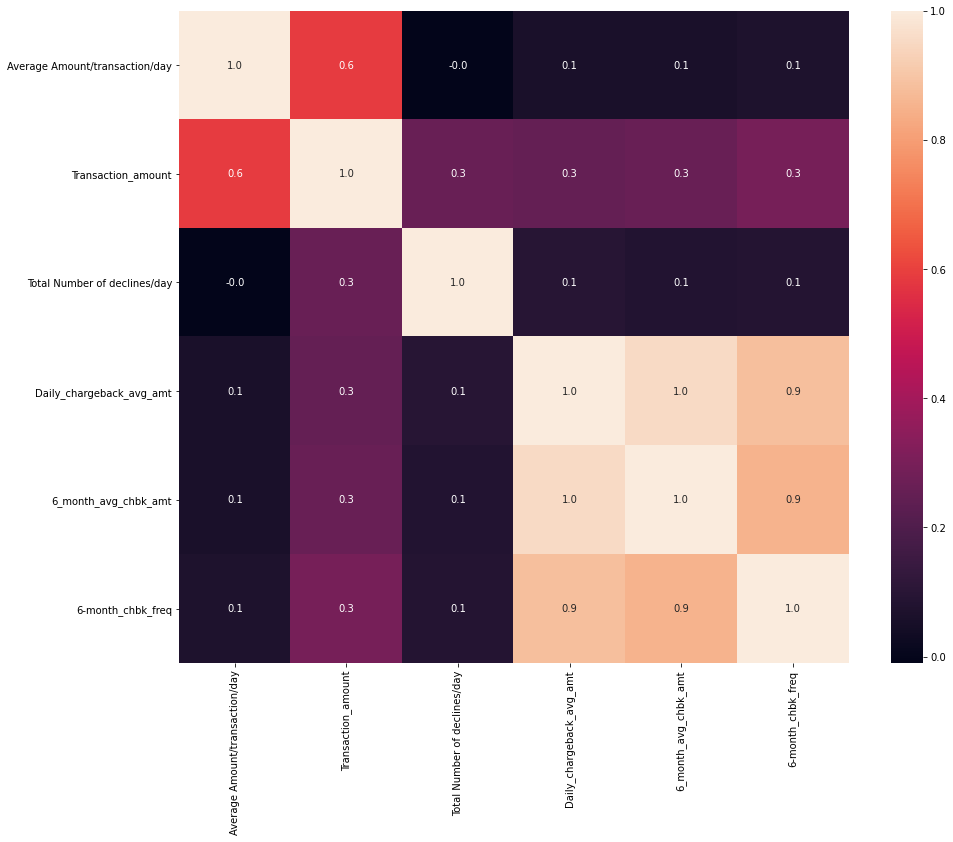

In [11]:
# Show the correlation of the data
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

##Data preprocessing

In [12]:
data = data.replace({'N': 0, 'Y': 1})
data.head()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,500.0,26000.0,0,0,1,1,800,677.2,6,1


In [13]:
from sklearn import preprocessing

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(min_max_scaler.fit_transform(data), columns=data.columns, index=data.index)

In [14]:
df.head()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,0.048091,0.027778,0.0,0.25,1.0,1.0,0.000000,0.000000,0.000000,1.0
1,0.048091,0.039815,0.0,0.25,1.0,1.0,0.000000,0.000000,0.000000,1.0
2,0.090927,0.044657,1.0,0.25,0.0,0.0,0.000000,0.000000,0.000000,1.0
3,0.090927,0.046375,1.0,0.40,0.0,0.0,0.000000,0.000000,0.000000,1.0
4,0.248493,0.240741,0.0,0.00,1.0,1.0,0.801603,0.678557,0.666667,1.0


## k-means clustering

In [15]:
# Calculate the optimal value of k using silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
scores = []
for cluster_num in range(2, 10):
     model = KMeans(n_clusters=cluster_num)
     model.fit(data)
     score = silhouette_score(data, model.predict(data))
     scores.append(score)

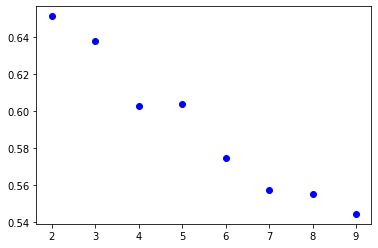

In [16]:
plt.scatter(range(2, 10), scores, color='blue')
plt.show()

In [36]:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(data)
y_pred = k_means.predict(data)
labels = k_means.labels_
print(labels)
data["Cluster"] = labels
data.head(5)

[0 0 0 ... 1 0 1]


,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent,Cluster
0,100.0,3000.0,0,5,1,1,0,0.0,0,1,0
1,100.0,4300.0,0,5,1,1,0,0.0,0,1,0
2,185.5,4823.0,1,5,0,0,0,0.0,0,1,0
3,185.5,5008.5,1,8,0,0,0,0.0,0,1,0
4,500.0,26000.0,0,0,1,1,800,677.2,6,1,1


Text(0.5, 1.0, 'Confusion Matrix')

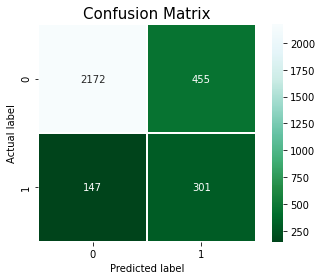

In [37]:
from sklearn import metrics
cm = metrics.confusion_matrix(data['isFradulent'], y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'BuGn_r')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
ax.set_title('Confusion Matrix', size = 15) 

In [38]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(df['isFradulent'], labels))
print("Completeness: %0.3f" % metrics.completeness_score(df['isFradulent'], labels))
print("V-measure: %0.3f" % metrics.v_measure_score(df['isFradulent'], labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(df['isFradulent'], labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(df['isFradulent'], labels))
X = data.drop(['isFradulent'], axis=1)
X = data.drop(['isFradulent'], axis=1)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, df['isFradulent'], metric='sqeuclidean'))

Homogeneity: 0.173
Completeness: 0.129
V-measure: 0.148
Adjusted Rand Index: 0.276
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.623


In [39]:
data.groupby('Cluster').mean()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
Cluster,,,,,,,,,,
0,434.203961,5275.728090,0.008624,0.709789,0.179819,0.031048,33.049159,22.458603,0.198793,0.063389
1,762.946660,23988.775303,0.048942,1.716931,0.382275,0.175926,125.333333,93.898677,0.984127,0.398148


In [40]:
data[['isFradulent', 'Cluster']]

,isFradulent,Cluster
0,1,0
1,1,0
2,1,0
3,1,0
4,1,1
...,...,...
3070,0,0
3071,0,0
3072,0,1
3073,0,0


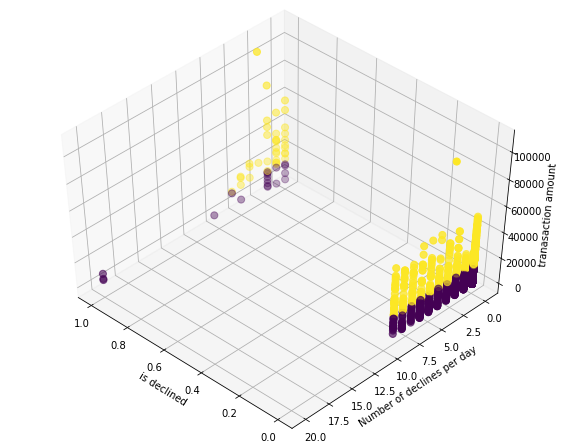

In [43]:
#3-D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.set_xlabel('is declined')
ax.set_ylabel('Number of declines per day')
ax.set_zlabel('tranasaction amount')
ax.scatter(data['Is declined'], data['Total Number of declines/day'], data['Transaction_amount'], s=50, c= labels.astype(np.float))
plt.show()

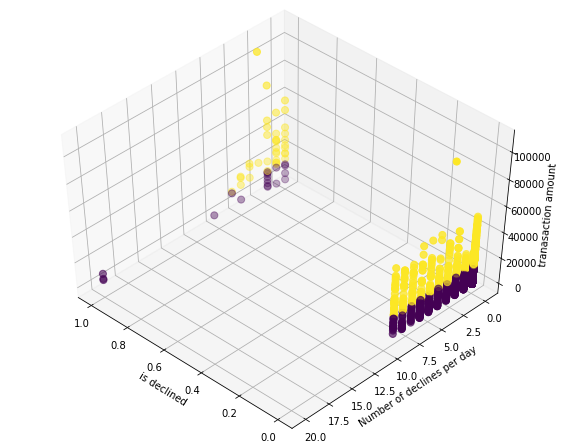

In [44]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.set_xlabel('is declined')
ax.set_ylabel('Number of declines per day')
ax.set_zlabel('tranasaction amount')
ax.scatter(data['Is declined'], data['Total Number of declines/day'], data['Transaction_amount'], s=50, c= labels.astype(np.float))
plt.show()

## Isolation Forest

In [45]:
from sklearn.ensemble import IsolationForest

In [46]:
from sklearn.model_selection import train_test_split
X = data.drop(['isFradulent'], axis=1)
X = X.drop(['Cluster'], axis=1)
y = data['isFradulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
X = data.drop(['Cluster'], axis=1)
clf.fit(X)
y_pred = clf.predict(X)
y_pred = [1 if x == -1 else 0 for x in y_pred]

Text(0.5, 1.0, 'Confusion Matrix')

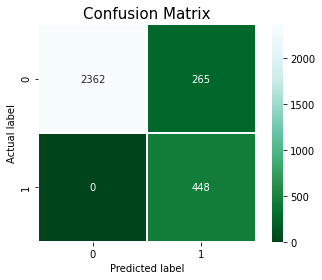

In [48]:
cm = metrics.confusion_matrix(data['isFradulent'], y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'BuGn_r')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
ax.set_title('Confusion Matrix', size = 15) 

In [49]:
print('Accuracy: {:.4f}'.format(metrics.accuracy_score(data['isFradulent'], y_pred)))
print('Precision: {:.4f}'.format(metrics.precision_score(data['isFradulent'], y_pred)))
print('Recall: {:.4f}'.format(metrics.recall_score(data['isFradulent'], y_pred)))
print('F1: {:.4f}'.format(metrics.f1_score(data['isFradulent'], y_pred)))

Accuracy: 0.9138
Precision: 0.6283
Recall: 1.0000
F1: 0.7717


In [50]:
#Using local outlier factor to calculate the vecinity based on the 15 nearest neighbors
from sklearn.neighbors import LocalOutlierFactor

y = data['isFradulent']

X = data.drop(['isFradulent'], axis=1)

clfLOF = LocalOutlierFactor(n_neighbors=15, metric='euclidean', algorithm='auto', contamination=0.15, n_jobs=-1)
y_train_LOF = clfLOF.fit_predict(X, y)
y_LOF = pd.DataFrame(y_train_LOF)

In [51]:
y_LOF = y_LOF.replace({1:0, -1:1})
print('Resultados: ', y_LOF[0].value_counts(), y.value_counts())

Resultados:  0    2613
1     462
Name: 0, dtype: int64 0    2627
1     448
Name: isFradulent, dtype: int64


Text(0.5, 1.0, 'Confusion Matrix')

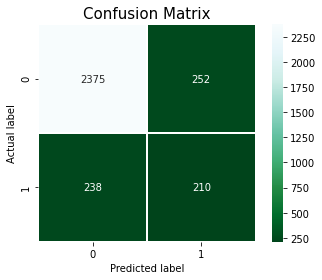

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(data['isFradulent'], y_LOF)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'BuGn_r')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
ax.set_title('Confusion Matrix', size = 15) 

In [53]:
print('Accuracy: {:.4f}'.format(metrics.accuracy_score(data['isFradulent'], y_LOF)))
print('Precision: {:.4f}'.format(metrics.precision_score(data['isFradulent'], y_LOF)))
print('Recall: {:.4f}'.format(metrics.recall_score(data['isFradulent'], y_LOF)))
print('F1: {:.4f}'.format(metrics.f1_score(data['isFradulent'], y_LOF)))

Accuracy: 0.8407
Precision: 0.4545
Recall: 0.4688
F1: 0.4615
